In [1]:
using QuantumCumulants
using ModelingToolkit, OrdinaryDiffEq
using Plots

### Multi atom laser

In [17]:
# Parameters
N = 2 #number of atoms
κ, g, Γ23, Γ13, Γ12, Ω, Δc, Δ3 = cnumbers("κ g Γ_{23} Γ_{13} Γ_{12} Ω Δ_c Δ_3")

# Hilbertspace
hf = FockSpace(:cavity)
ha = ⊗([NLevelSpace(Symbol(:atom,i),3) for i=1:N]...)
h = hf ⊗ ha

# Operators
a = Destroy(h,:a)
σ(i,j,k) = Transition(h,Symbol("σ_{$k}"),i,j,k+1)

σ (generic function with 1 method)

In [18]:
# Hamiltonian
H = -Δc*a'a + sum(g*(a'*σ(1,2,i) + a*σ(2,1,i)) for i=1:N) + sum(Ω*(σ(3,1,i) + σ(1,3,i)) for i=1:N) - sum(Δ3*σ(3,3,i) for i=1:N)

# Jumps
J = [a;[σ(1,2,i) for i=1:N];[σ(1,3,i) for i=1:N];[σ(2,3,i) for i=1:N]]

# Rates
rates = [κ;[Γ12 for i=1:N];[Γ13 for i=1:N];[Γ23 for i=1:N]]

7-element Vector{SymbolicUtils.BasicSymbolic{Complex{Real}}}:
 κ
 var"Γ_{12}"
 var"Γ_{12}"
 var"Γ_{13}"
 var"Γ_{13}"
 var"Γ_{23}"
 var"Γ_{23}"

In [19]:
# list of operators
ops = [a'a, σ(2,2,1), σ(3,3,1)]

eqs = meanfield(ops,H,J; rates=rates)
eqs_expanded = cumulant_expansion(eqs,2) #second order average

∂ₜ(⟨a′*a⟩) = (0 + 1im)*g*(⟨a*σ_{1}21⟩ + ⟨a*σ_{2}21⟩) + (0 - 1im)*g*(⟨a′*σ_{2}12⟩ + ⟨a′*σ_{1}12⟩) - ⟨a′*a⟩*κ
∂ₜ(⟨σ_{1}22⟩) = (0 - 1im)*g*⟨a*σ_{1}21⟩ + (0 + 1im)*g*⟨a′*σ_{1}12⟩ + ⟨σ_{1}33⟩*var"Γ_{23}" - ⟨σ_{1}22⟩*var"Γ_{12}"
∂ₜ(⟨σ_{1}33⟩) = ⟨σ_{1}33⟩*(-var"Γ_{13}" - var"Γ_{23}") + (0 - 1im)*⟨σ_{1}31⟩*Ω + (0 + 1im)*⟨σ_{1}13⟩*Ω


In [20]:
me_comp = complete(eqs_expanded) #automatically complete the system

∂ₜ(⟨a′*a⟩) = (0 + 1im)*g*(⟨a*σ_{1}21⟩ + ⟨a*σ_{2}21⟩) + (0 - 1im)*g*(⟨a′*σ_{2}12⟩ + ⟨a′*σ_{1}12⟩) - ⟨a′*a⟩*κ
∂ₜ(⟨σ_{1}22⟩) = (0 - 1im)*g*⟨a*σ_{1}21⟩ + (0 + 1im)*g*⟨a′*σ_{1}12⟩ + ⟨σ_{1}33⟩*var"Γ_{23}" - ⟨σ_{1}22⟩*var"Γ_{12}"
∂ₜ(⟨σ_{1}33⟩) = ⟨σ_{1}33⟩*(-var"Γ_{13}" - var"Γ_{23}") + (0 - 1im)*⟨σ_{1}31⟩*Ω + (0 + 1im)*⟨σ_{1}13⟩*Ω
∂ₜ(⟨a*σ_{1}21⟩) = (0 - 1im)*g*(⟨σ_{1}21*σ_{2}12⟩ + ⟨σ_{1}22⟩) + (0 + 1im)*g*⟨a′*a⟩ + (0 - 1im)*⟨a*σ_{1}23⟩*Ω - 0.5⟨a*σ_{1}21⟩*(var"Γ_{12}" + κ) + (0 + 1im)*⟨a*σ_{1}21⟩*Δ_c + (0 - 1im)*g*(⟨a⟩*⟨a′*σ_{1}33⟩ + ⟨σ_{1}33⟩*⟨a′*a⟩ + ⟨a*σ_{1}33⟩*⟨a′⟩ - 2⟨a⟩*⟨σ_{1}33⟩*⟨a′⟩) + (0 - 2im)*g*(⟨a⟩*⟨a′*σ_{1}22⟩ + ⟨a*σ_{1}22⟩*⟨a′⟩ + ⟨a′*a⟩*⟨σ_{1}22⟩ - 2⟨a⟩*⟨a′⟩*⟨σ_{1}22⟩)
∂ₜ(⟨a*σ_{2}21⟩) = (0 - 1im)*g*⟨σ_{2}22⟩ + (0 + 1im)*g*⟨a′*a⟩ + (0 - 1im)*g*⟨σ_{1}12*σ_{2}21⟩ + (0 - 1im)*⟨a*σ_{2}23⟩*Ω - 0.5⟨a*σ_{2}21⟩*(var"Γ_{12}" + κ) + (0 + 1im)*⟨a*σ_{2}21⟩*Δ_c + (0 - 2im)*g*(⟨a⟩*⟨a′*σ_{2}22⟩ + ⟨σ_{2}22⟩*⟨a′*a⟩ + ⟨a*σ_{2}22⟩*⟨a′⟩ - 2⟨a⟩*⟨σ_{2}22⟩*⟨a′⟩) + (0 - 1im)*g*(⟨a⟩*⟨a′*σ_{2}33⟩ + ⟨σ_{2}3

In [21]:
# Build an ODESystem out of the MeanfieldEquations
@named sys = ODESystem(me_comp)

Model sys:
Equations (63):
  63 standard: see equations(sys)
Unknowns (63): see unknowns(sys)
  var"⟨a′*a⟩"(t)
  var"⟨σ_{1}22⟩"(t)
  var"⟨σ_{1}33⟩"(t)
  var"⟨a*σ_{1}21⟩"(t)
  ⋮
Parameters (8): see parameters(sys)
  Δ_3
  g
  var"Γ_{12}"
  κ
  ⋮

In [22]:
# initial state
u0 = zeros(ComplexF64, length(me_comp))

Γ12n = 1.0
Γ23n = 20Γ12n
Γ13n = 2Γ12n
Ωn = 5Γ13n
gn = 2Γ12n
Δcn = 0.0
Δ3n = 0.0
κn = 0.5Γ12n

# list of parameters
ps = (g, Γ23, Γ13, Γ12, Ω, Δc, Δ3, κ)
p0 = ps .=> (gn, Γ23n, Γ13n, Γ12n, Ωn, Δcn, Δ3n, κn)
tend = 10.0/κn

prob = ODEProblem(sys,u0,(0.0,tend),p0)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 356-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0007971744798151202
  0.0020448461205449854
  0.003534156239634679
  0.005377336599065483
  0.007493558098672866
  0.009906835774434552
  0.012572626309721868
  0.015483707705551098
  ⋮
 19.381896000955397
 19.46867160988327
 19.55567900709142
 19.642922652002703
 19.730325334005805
 19.817699952451303
 19.90474314661034
 19.991112311551003
 20.0
u: 356-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [5.330102264584564e-18 + 0.0im, 6.661001576794961e-10 + 0.0im, 9.989003725405186e-7 + 0.0im, 0.0 - 3.3310170964017044e-14im, 0.0 - 3.3310170964017044e-14im, 0.0 + 0.0009994495355110608im, -2.66502601932

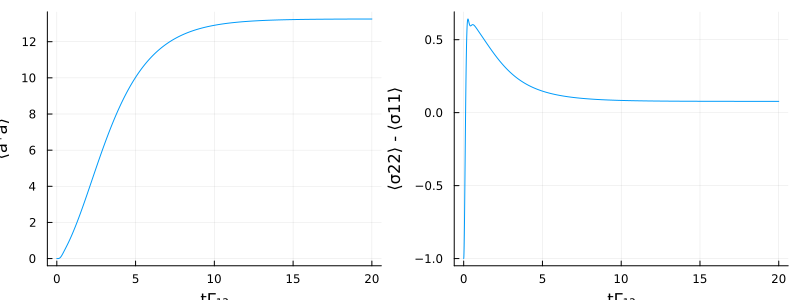

In [23]:
n_t = real.(sol[average(a'*a)])
σ22m11_t = real.(2*sol[σ(2,2,1)] .+ sol[σ(3,3,1)] .-1 ) #σ11 + σ22 + σ33 = 𝟙

# Plot
p1 = plot(sol.t, n_t, xlabel="tΓ₁₂", ylabel="⟨a⁺a⟩", legend = false)
p2 = plot(sol.t, σ22m11_t, xlabel="tΓ₁₂", ylabel="⟨σ22⟩ - ⟨σ11⟩", legend = false)
plot(p1, p2, layout=(1,2), size=(800,300))